# Скачивание данных

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sahilislam007/college-student-placement-factors-dataset")

print("Path to dataset files:", path)

c:\Users\Admin\college_students\Col_stud_placement\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Admin\.cache\kagglehub\datasets\sahilislam007\college-student-placement-factors-dataset\versions\1


# Импрот библиотек и загрузка данных

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df = pd.read_csv(path + "/college_student_placement_dataset.csv")
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [7]:
df.tail()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
9995,CLG0021,119,8.41,8.29,4,No,1,8,0,Yes
9996,CLG0098,70,9.25,9.34,7,No,0,7,2,No
9997,CLG0066,89,6.08,6.25,3,Yes,3,9,5,No
9998,CLG0045,107,8.77,8.92,3,No,7,5,1,No
9999,CLG0060,109,9.41,9.77,8,No,3,5,5,No


# Предобработка данных

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


In [14]:
df.duplicated().sum()

np.int64(0)

Видим, что нет как пропущенных значении, так и дубликатов

# EDA

In [16]:
df.describe()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,99.471800,7.535673,7.532379,5.546400,4.970900,5.561800,2.513400
std,15.053101,1.447519,1.470141,2.873477,3.160103,2.900866,1.715959
min,41.000000,5.000000,4.540000,1.000000,0.000000,1.000000,0.000000
25%,89.000000,6.290000,6.290000,3.000000,2.000000,3.000000,1.000000
50%,99.000000,7.560000,7.550000,6.000000,5.000000,6.000000,3.000000
75%,110.000000,8.790000,8.770000,8.000000,8.000000,8.000000,4.000000
max,158.000000,10.000000,10.460000,10.000000,10.000000,10.000000,5.000000


In [17]:
df.describe(include='object')

,College_ID,Internship_Experience,Placement
count,10000,10000,10000
unique,100,2,2
top,CLG0062,No,No
freq,133,6036,8341


Text(0.5, 1.0, 'Placement Status Distribution')

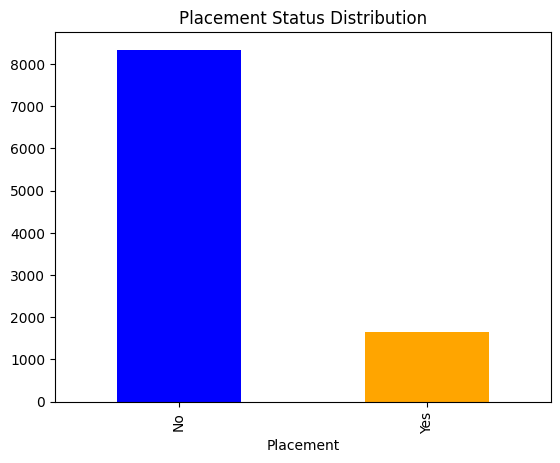

In [18]:
df['Placement'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Placement Status Distribution')

Есть сильный дисбаланс классов. Непоступивших больше. будет использовать либо SMOTE, либо другие метрики классификации.

In [19]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"Unique values in {col}: {df[col].unique()}")

Unique values in College_ID: ['CLG0030' 'CLG0061' 'CLG0036' 'CLG0055' 'CLG0004' 'CLG0015' 'CLG0071'
 'CLG0096' 'CLG0097' 'CLG0057' 'CLG0063' 'CLG0077' 'CLG0064' 'CLG0017'
 'CLG0053' 'CLG0040' 'CLG0070' 'CLG0050' 'CLG0068' 'CLG0072' 'CLG0034'
 'CLG0087' 'CLG0073' 'CLG0024' 'CLG0008' 'CLG0025' 'CLG0018' 'CLG0014'
 'CLG0006' 'CLG0082' 'CLG0090' 'CLG0075' 'CLG0094' 'CLG0089' 'CLG0016'
 'CLG0076' 'CLG0047' 'CLG0054' 'CLG0058' 'CLG0100' 'CLG0046' 'CLG0001'
 'CLG0041' 'CLG0093' 'CLG0027' 'CLG0062' 'CLG0081' 'CLG0028' 'CLG0020'
 'CLG0051' 'CLG0069' 'CLG0088' 'CLG0038' 'CLG0029' 'CLG0035' 'CLG0019'
 'CLG0005' 'CLG0026' 'CLG0066' 'CLG0045' 'CLG0043' 'CLG0074' 'CLG0048'
 'CLG0012' 'CLG0099' 'CLG0011' 'CLG0091' 'CLG0083' 'CLG0080' 'CLG0044'
 'CLG0059' 'CLG0031' 'CLG0039' 'CLG0065' 'CLG0079' 'CLG0095' 'CLG0085'
 'CLG0033' 'CLG0007' 'CLG0037' 'CLG0032' 'CLG0049' 'CLG0056' 'CLG0084'
 'CLG0067' 'CLG0098' 'CLG0042' 'CLG0021' 'CLG0009' 'CLG0010' 'CLG0078'
 'CLG0013' 'CLG0003' 'CLG0092' 'CLG0086' 'CLG002

College_ID надо удалить из данных, а остальные катеориальные переменные закодировать бинарными перемеными (0,1)

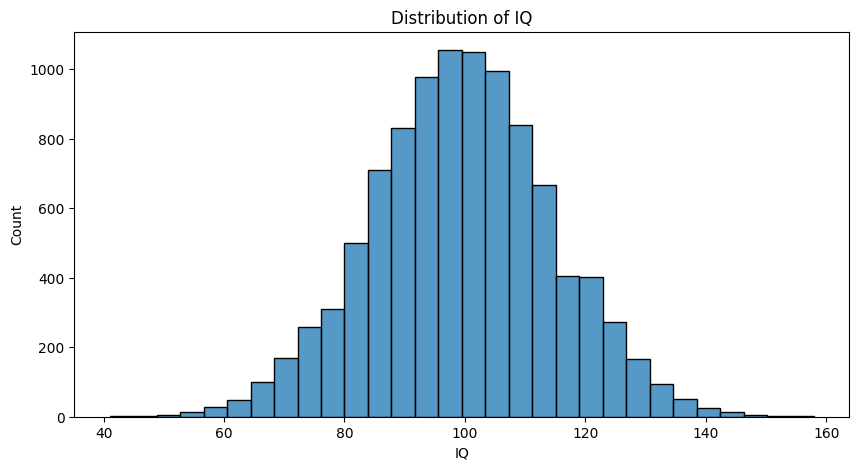

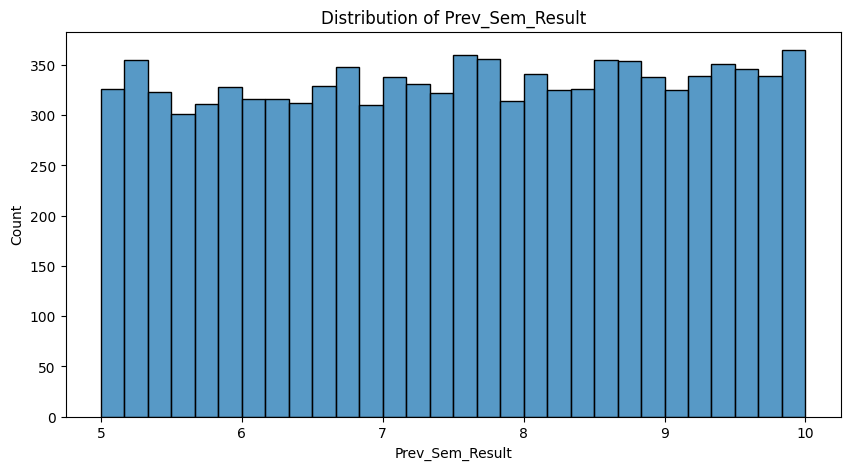

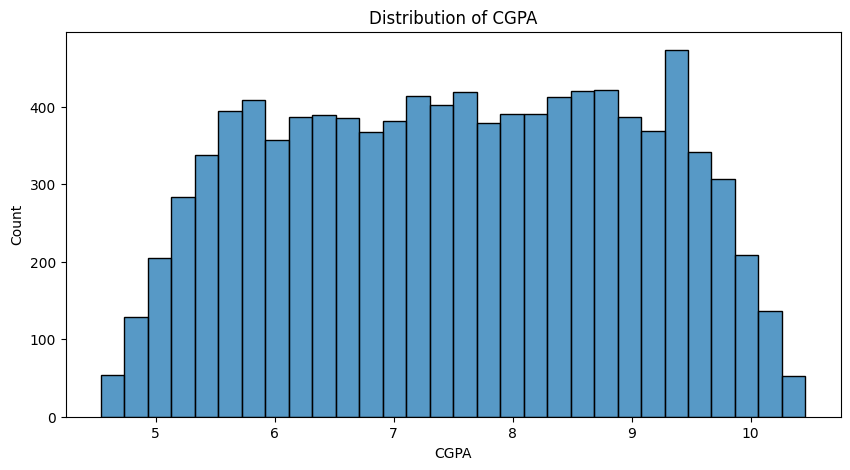

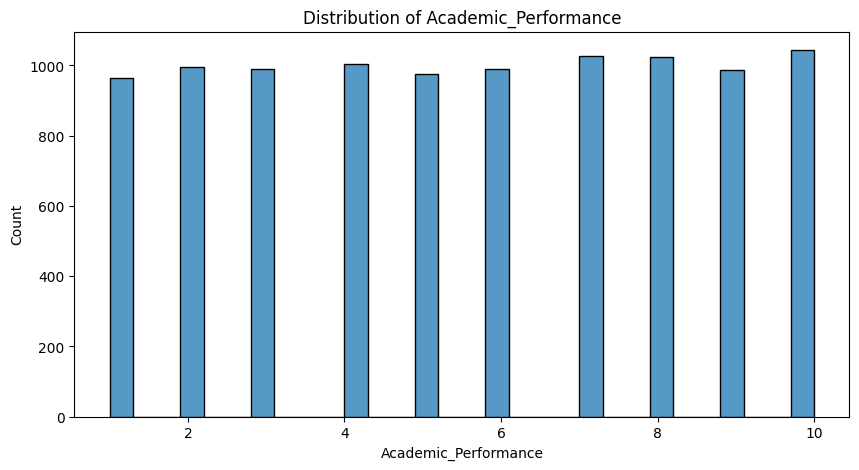

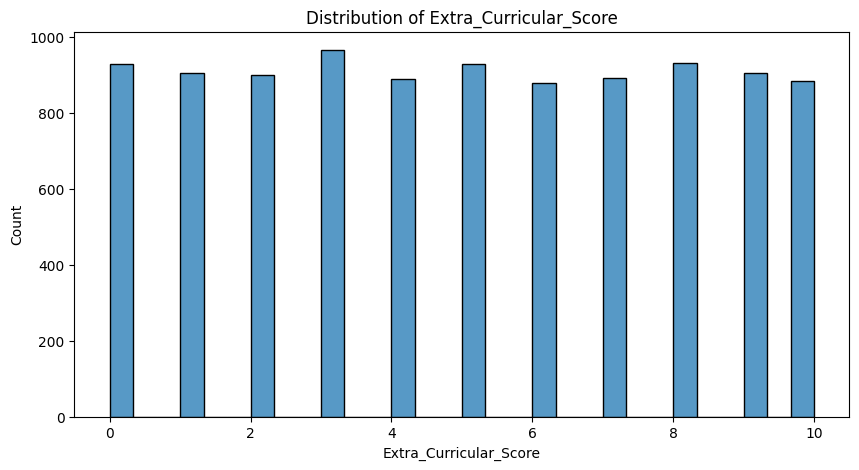

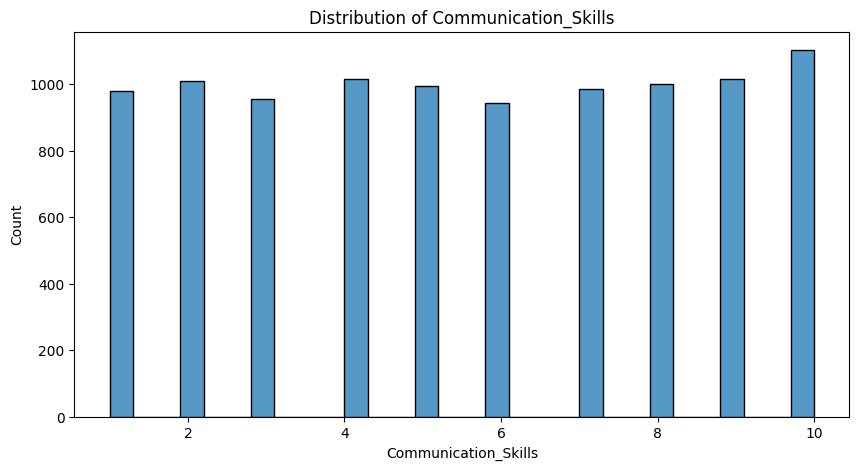

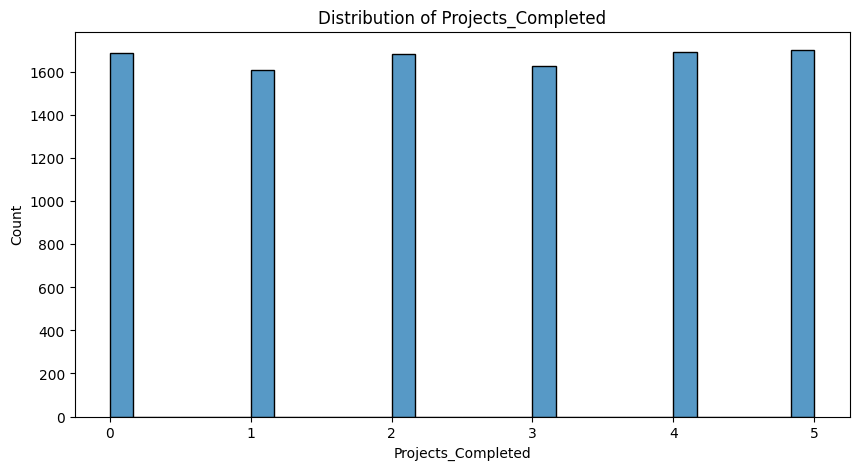

In [24]:
for col in df.columns:
    if df[col].dtype == 'int' or df[col].dtype == 'float':
        plt.figure(figsize=(10, 5))
        sns.histplot(df[col], bins=30)
        plt.title(f'Distribution of {col}')
        plt.show()

IQ визуально имеет нормальное распределение, Academic_Perfomance и Projects_Completed похожи на равномерное распределение (с небольшой погрешностью), а остальные графики визуально не имеют теоретических распределении